   # <h1 align="center"> Truncated SVD
   
  
   
   
   

In [1]:
import numpy as np
import pandas as pd



import sklearn
from sklearn.decomposition import TruncatedSVD

**Loading data from csv file to the data frame**

In [2]:
columns = ['ID','Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Dt_Customer','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Z_CostContact','Z_Revenue','Response']
data = pd.read_csv('rawdataset.csv', sep=',', names=columns)
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09/09/2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13/11/2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08/05/2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06/06/2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13/03/2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [3]:
data['ID'] ='a' + data['ID'].astype(str)
data.head(200)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,a5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,a2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,a4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,a6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,a5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,a7224,1977,Graduation,Married,31353.0,1,1,29/12/2013,24,10,...,8,0,0,0,0,0,0,3,11,0
196,a6999,1980,Master,Married,69661.0,0,0,13/05/2014,80,656,...,3,0,0,0,0,0,0,3,11,0
197,a9938,1954,Graduation,Married,80067.0,0,0,19/09/2013,82,519,...,2,0,0,1,0,0,0,3,11,0
198,a6422,1954,Graduation,Married,86718.0,0,0,17/01/2013,20,344,...,2,0,0,0,0,0,0,3,11,0


In [4]:
data.insert(0,'Numbers',range(1,1+len(data)))
data.head()

,Numbers,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1,a5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,...,7,0,0,0,0,0,0,3,11,1
1,2,a2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,...,5,0,0,0,0,0,0,3,11,0
2,3,a4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,...,4,0,0,0,0,0,0,3,11,0
3,4,a6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,...,6,0,0,0,0,0,0,3,11,0
4,5,a5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,...,5,0,0,0,0,0,0,3,11,0


In [5]:
data.shape

(2240, 30)

In [6]:
data.isnull().sum()

Numbers                 0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
fdata = data.dropna(how='any')

In [8]:
Storepurc_crosstab = fdata.pivot_table(values='NumStorePurchases', index='Numbers', columns='ID', fill_value=0)
Storepurc_crosstab.head()

ID,a0,a1,a1000,a10001,a10010,a10022,a10031,a10032,a10033,a10037,...,a9971,a9972,a9973,a9974,a9977,a9984,a9986,a9988,a999,a9999
Numbers,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
Storepurc_crosstab.shape

(2216, 2216)

**Performing Matrix Transpose**

In [10]:
X = Storepurc_crosstab.T
X.shape

(2216, 2216)

**Computing Matrix Decomposition**

In [11]:
SVD = TruncatedSVD(n_components=10, random_state=15)

resultant_matrix = SVD.fit_transform(X)

resultant_matrix.shape

(2216, 10)

**Correlation Matrix Generation**

In [12]:
corr_mat = np.corrcoef(resultant_matrix)
corr_mat.shape

(2216, 2216)

In [13]:
np.corrcoef(resultant_matrix)[2212]

array([ 0.10724663, -0.27552896, -0.5159572 , ..., -0.58632201,
       -0.30683799, -0.16451729])

In [14]:
value = input("please enter the customer ID: ")

please enter the customer ID: a10022


**Finding out the Index of the given Input**

In [15]:
Similar_CX = Storepurc_crosstab.columns
CX_list = list(Similar_CX)
#print(CX_list)
#print(CX_list.index(value))
item = CX_list.index(value)
item

5

**Predicts the group of customers similar to the given input**

In [16]:
corr_item = corr_mat[item]
corr_item.shape

(2216,)

**Customers within the given Range of Coefficinet**

In [17]:
lvar=list(Similar_CX[(corr_item < 1.0) & (corr_item > 0.77)])

In [18]:
lvar

['a10084',
 'a2488',
 'a380',
 'a4094',
 'a7101',
 'a7143',
 'a843',
 'a8876',
 'a9727']

In [19]:
data

,Numbers,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1,a5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,...,7,0,0,0,0,0,0,3,11,1
1,2,a2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,...,5,0,0,0,0,0,0,3,11,0
2,3,a4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,...,4,0,0,0,0,0,0,3,11,0
3,4,a6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,...,6,0,0,0,0,0,0,3,11,0
4,5,a5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2236,a10870,1967,Graduation,Married,61223.0,0,1,13/06/2013,46,...,5,0,0,0,0,0,0,3,11,0
2236,2237,a4001,1946,PhD,Together,64014.0,2,1,10/06/2014,56,...,7,0,0,0,1,0,0,3,11,0
2237,2238,a7270,1981,Graduation,Divorced,56981.0,0,0,25/01/2014,91,...,6,0,1,0,0,0,0,3,11,0
2238,2239,a8235,1956,Master,Together,69245.0,0,1,24/01/2014,8,...,3,0,0,0,0,0,0,3,11,0


In [20]:
fea = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

In [21]:
data[data.ID==value]

,Numbers,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1112,1113,a10022,1973,PhD,Single,54466.0,1,1,09/02/2014,78,...,5,0,0,0,0,0,0,3,11,0


In [22]:
for f in fea:
    a = 0
    for x in lvar :
        a = a + data[data.ID==x][f].values[0]
    print("Average purchasing of ",f, "is",a/len(lvar),"by closest customers")

Average purchasing of  MntWines is 333.1111111111111 by closest customers
Average purchasing of  MntFruits is 26.555555555555557 by closest customers
Average purchasing of  MntMeatProducts is 109.22222222222223 by closest customers
Average purchasing of  MntFishProducts is 20.22222222222222 by closest customers
Average purchasing of  MntSweetProducts is 39.44444444444444 by closest customers
Average purchasing of  MntGoldProds is 56.22222222222222 by closest customers


In [23]:
for f in fea:
    a = 0
    for x in lvar :
        a = a + data[data.ID==x][f].values[0]
    if data[data.ID==value][f].values[0] < a/len(lvar) :
        print("User :",value,"can buy an amount of ",a/len(lvar)-data[data.ID==value][f].values[0],"of ",f,"in coming future")

User : a10022 can buy an amount of  321.1111111111111 of  MntWines in coming future
User : a10022 can buy an amount of  26.555555555555557 of  MntFruits in coming future
User : a10022 can buy an amount of  105.22222222222223 of  MntMeatProducts in coming future
User : a10022 can buy an amount of  20.22222222222222 of  MntFishProducts in coming future
User : a10022 can buy an amount of  39.44444444444444 of  MntSweetProducts in coming future
User : a10022 can buy an amount of  56.22222222222222 of  MntGoldProds in coming future


**K-Means**

Text(0, 0.5, 'Inertia')

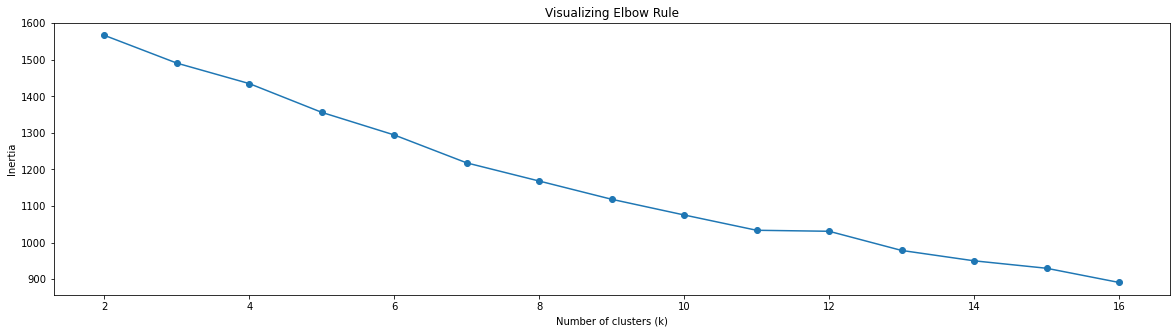

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
clsrange = range(2,17)

inert = []

for n in clsrange:
    kmeans_model = KMeans(n, random_state=42, init='k-means++').fit(resultant_matrix)
    inert.append(kmeans_model.inertia_)

plt.figure(figsize=(20,5))    
plt.title("Visualizing Elbow Rule")
plt.plot(clsrange, inert, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

**K-Value should be that where after the distortion/inertia start decreasing i.e., at elbow point in the plot.**

In [25]:
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=42)
kmeans.fit(resultant_matrix)

pred = kmeans.predict(resultant_matrix)

df_clustered = fdata.copy()
df_clustered['Cluster'] = pred + 1

In [26]:
df_clustered

,Numbers,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Cluster
0,1,a5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,...,0,0,0,0,0,0,3,11,1,1
1,2,a2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,...,0,0,0,0,0,0,3,11,0,1
2,3,a4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,...,0,0,0,0,0,0,3,11,0,1
3,4,a6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,...,0,0,0,0,0,0,3,11,0,1
4,5,a5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,...,0,0,0,0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2236,a10870,1967,Graduation,Married,61223.0,0,1,13/06/2013,46,...,0,0,0,0,0,0,3,11,0,1
2236,2237,a4001,1946,PhD,Together,64014.0,2,1,10/06/2014,56,...,0,0,0,1,0,0,3,11,0,1
2237,2238,a7270,1981,Graduation,Divorced,56981.0,0,0,25/01/2014,91,...,0,1,0,0,0,0,3,11,0,5
2238,2239,a8235,1956,Master,Together,69245.0,0,1,24/01/2014,8,...,0,0,0,0,0,0,3,11,0,1


In [27]:
df_clustered["Cluster"].value_counts()

1    2149
5      15
6      12
3      12
4      10
7       9
2       9
Name: Cluster, dtype: int64